In [ ]:
#!pip install -i https://mirror.baidu.com/pypi/simple

## Import PaddleOcr model

In [ ]:
# Import ORC Libraries
!git clone https://github.com/PaddlePaddle/PaddleOCR
!pip install paddleocr --upgrade
!pip install paddlepaddle
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.
  Using cached paddlepaddle-2.6.1-cp310-cp310-manylinux1_x86_64.whl (125.9 MB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [ ]:
#download ocr model
ocr_model = PaddleOCR(lang='en')


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:07<00:00, 513kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:07<00:00, 1.46MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:11<00:00, 190kiB/s]

[2024/03/31 05:58:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:

from IPython.display import display
from PIL import Image


from google.colab.patches import cv2_imshow
import cv2 as cv
# path="/path/to/image.jpg"
# display(Image.open(path))

In [ ]:
img_path = os.path.join('.', r'/content/dolo 650.jpg')

In [ ]:
result = ocr_model.ocr(img_path)


[2024/03/31 05:59:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/31 05:59:17] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.07408380508422852
[2024/03/31 05:59:17] ppocr DEBUG: rec_res num  : 4, elapsed : 0.19925498962402344


In [ ]:
result

[[[[[31.0, 72.0], [79.0, 74.0], [78.0, 87.0], [30.0, 84.0]],
   ('Tablets IP', 0.8867529630661011)],
  [[[38.0, 64.0], [85.0, 64.0], [85.0, 71.0], [38.0, 71.0]],
   ('araceamc', 0.9175740480422974)],
  [[[31.0, 150.0], [91.0, 150.0], [91.0, 161.0], [31.0, 161.0]],
   ('Paracetamol', 0.9977157711982727)],
  [[[31.0, 163.0], [78.0, 163.0], [78.0, 173.0], [31.0, 173.0]],
   ('TabletsIP', 0.9245644807815552)]]]

In [ ]:
medicine_names = []

for item in result:
    for bounding_box, (medicine_name, confidence) in item:
        medicine_names.append(medicine_name)

print(medicine_names)

['Tablets IP', 'araceamc', 'Paracetamol', 'TabletsIP']


In [ ]:
# path=r'/content/drive/MyDrive/ocr images/dolo650.jpg'
# display(Image.open(path))

In [ ]:
img_path = os.path.join('.', r'/content/drug1.jpeg')
result = ocr_model.ocr(img_path)


[2024/03/31 05:59:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/31 05:59:17] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.22645211219787598
[2024/03/31 05:59:17] ppocr DEBUG: rec_res num  : 6, elapsed : 0.21334314346313477


In [ ]:
for res in result:
    print(res[0][0])

[[159.0, 171.0], [250.0, 174.0], [249.0, 193.0], [158.0, 190.0]]


In [ ]:
medicine_names = []

for item in result:
    for bounding_box, (medicine_name, confidence) in item:
        medicine_names.append(medicine_name)

print(medicine_names)


['NDC 0143-1477-01', 'PredniSONE', 'Tablets, USP', '20 mg', 'ROnly', '100TABLETS']


## Extracting Medicine Name From the Image

[2024/03/31 05:59:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/31 05:59:18] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.09885883331298828
[2024/03/31 05:59:18] ppocr DEBUG: rec_res num  : 6, elapsed : 0.19493675231933594


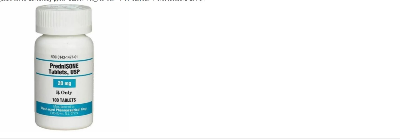

In [ ]:
img_path = os.path.join('.', r'/content/drug1.jpeg')
result = ocr_model.ocr(img_path)
img = cv.imread(img_path)
new_width = 400
new_height = int(img.shape[0] * (new_width / img.shape[1]))

resized_img = cv.resize(img, (new_width, new_height))

cv2_imshow(resized_img)


In [ ]:
for res in result:
    print(res[0][0])

[[159.0, 171.0], [250.0, 174.0], [249.0, 193.0], [158.0, 190.0]]


In [ ]:
result

[[[[[159.0, 171.0], [250.0, 174.0], [249.0, 193.0], [158.0, 190.0]],
   ('NDC 0143-1477-01', 0.9338515400886536)],
  [[[156.0, 197.0], [255.0, 200.0], [254.0, 224.0], [156.0, 221.0]],
   ('PredniSONE', 0.9795507192611694)],
  [[[153.0, 218.0], [257.0, 218.0], [257.0, 244.0], [153.0, 244.0]],
   ('Tablets, USP', 0.9326433539390564)],
  [[[181.0, 254.0], [232.0, 258.0], [231.0, 279.0], [180.0, 275.0]],
   ('20 mg', 0.932503879070282)],
  [[[175.0, 284.0], [234.0, 287.0], [233.0, 307.0], [174.0, 303.0]],
   ('ROnly', 0.9913366436958313)],
  [[[163.0, 309.0], [246.0, 312.0], [245.0, 332.0], [162.0, 329.0]],
   ('100TABLETS', 0.9901590347290039)]]]

In [ ]:
strings = []

for sublist in result:
    for subsublist in sublist:
        strings.append(subsublist[1][0])

print(strings)

['NDC 0143-1477-01', 'PredniSONE', 'Tablets, USP', '20 mg', 'ROnly', '100TABLETS']


In [ ]:
strings

['NDC 0143-1477-01',
 'PredniSONE',
 'Tablets, USP',
 '20 mg',
 'ROnly',
 '100TABLETS']

In [ ]:
img_text=' '.join(strings)

In [ ]:
img_text

'NDC 0143-1477-01 PredniSONE Tablets, USP 20 mg ROnly 100TABLETS'

DRUG NER

In [ ]:
!pip install drug-named-entity-recognition
from drug_named_entity_recognition import find_drugs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.1 MB/s eta 0:00:00


In [ ]:
drug_info=find_drugs("Prednisone Tablets,USP 20 mg ROnly 100 TABLETS Manufactured by Eatontown.N.J.07724".split(" "))

In [ ]:
drug_name = drug_info[0][0]['name']
drug_name

'Prednisone'

[2024/03/31 05:59:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/31 05:59:24] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.07031369209289551
[2024/03/31 05:59:24] ppocr DEBUG: rec_res num  : 8, elapsed : 0.29863500595092773


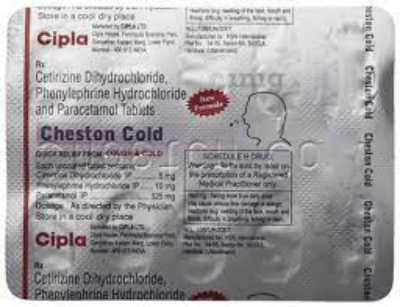

In [ ]:
img_path = os.path.join('.', r'/content/n4.jpg')
result = ocr_model.ocr(img_path)
img = cv.imread(img_path)
new_width = 400
new_height = int(img.shape[0] * (new_width / img.shape[1]))

resized_img = cv.resize(img, (new_width, new_height))

cv2_imshow(resized_img)


In [ ]:
for res in result:
    print(res[0][0])

[[23.0, 17.0], [59.0, 17.0], [59.0, 32.0], [23.0, 32.0]]


In [ ]:
result

[[[[[23.0, 17.0], [59.0, 17.0], [59.0, 32.0], [23.0, 32.0]],
   ('Cipla', 0.9927335977554321)],
  [[[21.0, 43.0], [107.0, 43.0], [107.0, 56.0], [21.0, 56.0]],
   ('Cetinizine Dnydrochloride', 0.8522592186927795)],
  [[[21.0, 53.0], [111.0, 53.0], [111.0, 67.0], [21.0, 67.0]],
   ('Phenylephrine Hydrochlon', 0.9381856918334961)],
  [[[21.0, 64.0], [102.0, 64.0], [102.0, 77.0], [21.0, 77.0]],
   ('and Paracatamol Tabrs', 0.8645782470703125)],
  [[[23.0, 78.0], [106.0, 79.0], [106.0, 93.0], [23.0, 92.0]],
   ('Cheston Cold', 0.963773250579834)],
  [[[22.0, 146.0], [56.0, 146.0], [56.0, 160.0], [22.0, 160.0]],
   ('Cipla', 0.9974931478500366)],
  [[[31.0, 175.0], [101.0, 175.0], [101.0, 183.0], [31.0, 183.0]],
   ('Irne baydrocnond', 0.6710036993026733)]]]

In [ ]:
strings = []

for sublist in result:
    for subsublist in sublist:
        strings.append(subsublist[1][0])

print(strings)

['Cipla', 'Cetinizine Dnydrochloride', 'Phenylephrine Hydrochlon', 'and Paracatamol Tabrs', 'Cheston Cold', 'Cipla', 'Irne baydrocnond']


In [ ]:
strings

['Cipla',
 'Cetinizine Dnydrochloride',
 'Phenylephrine Hydrochlon',
 'and Paracatamol Tabrs',
 'Cheston Cold',
 'Cipla',
 'Irne baydrocnond']

In [ ]:
img_text=' '.join(strings)

In [ ]:
img_text

'Cipla Cetinizine Dnydrochloride Phenylephrine Hydrochlon and Paracatamol Tabrs Cheston Cold Cipla Irne baydrocnond'

In [ ]:
drug_info=find_drugs("Nise Copy dosage from prescription: R Dr.Reddy's Nimesulide Tablets 100mg )Nise .00 Warning:Use of Nimesulide should ordinarily be restricted to 10 days.If longer clinical use is warranted,liver function test should be assessed periodically, WarningNot for use below 12 years of age .00 SCHEDULEHPRESSRIPTIONDRUG -CAUTION Not to be sold by retail without the prescaption of a Registered Medical Practitioner. Dosage as directed by the doctor Complete the course as prescribed by the doctor for most effective results with Nise Store in a cool place,protected from light .00 &moisture. Keep out of reach of children. Each uncoated tablet contains: Nimesulide BP. 100mg Manufactured in India by: Dr.Reddy's Laboratories Ltd. Village Mauja Thana Nalagarh Road ... BaddiDistt.Solan HP173205. ML: Registered Trademark 150075545 Nise".split())

In [ ]:
drug_name = drug_info[0][0]['name']
drug_name

'Nimesulide'